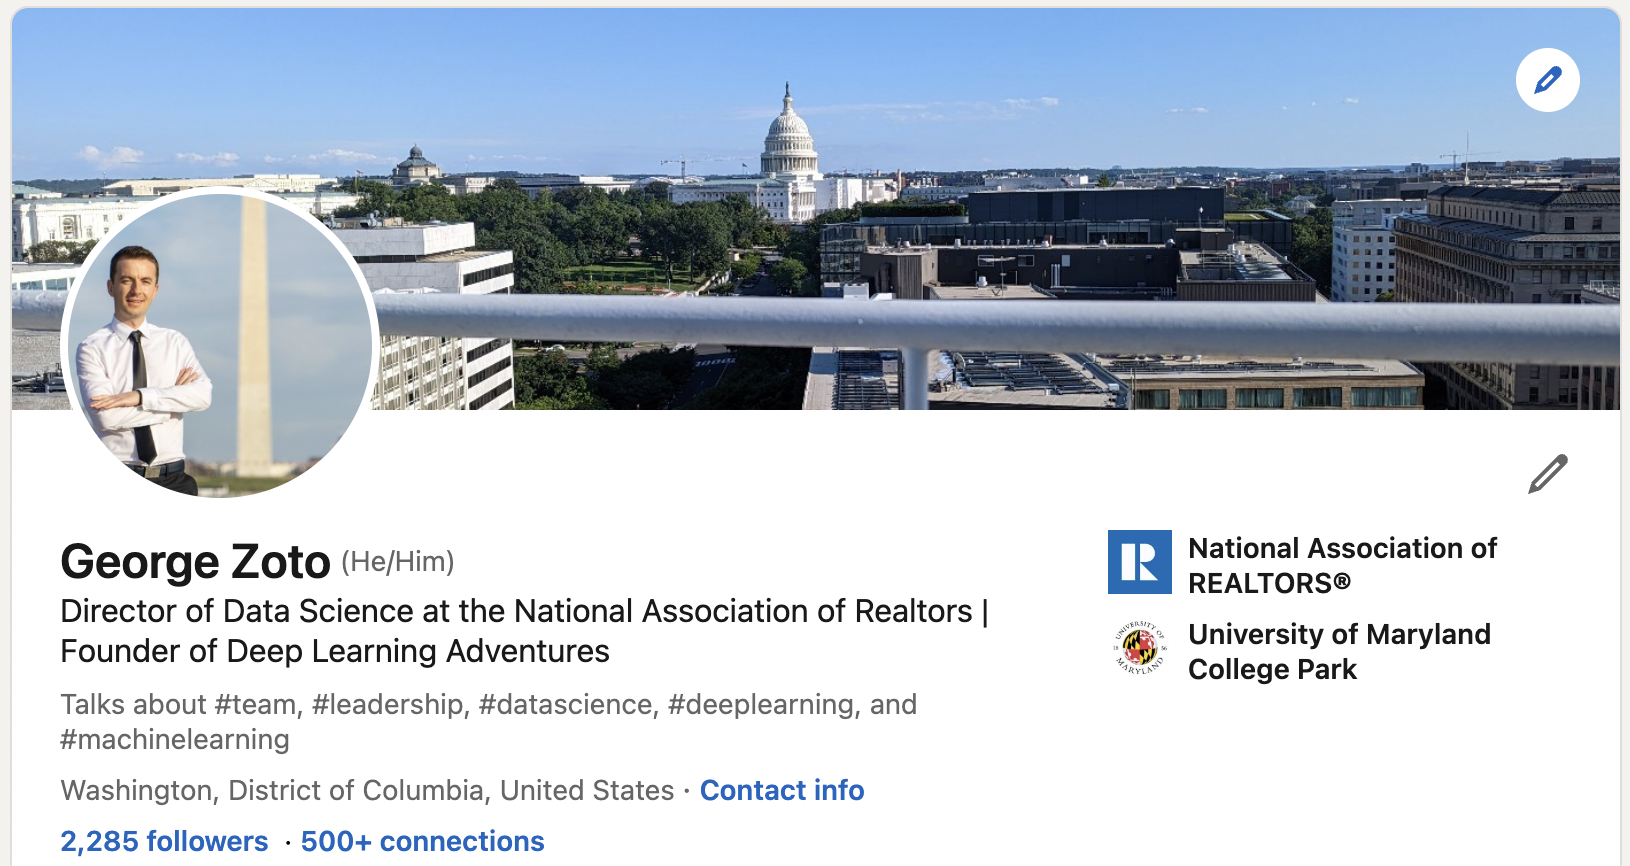

George Zoto
Director, Data Science | Information Technology   
NATIONAL ASSOCIATION OF REALTORS®  
500 New Jersey Ave NW | Washington, DC 20001  
Email: gzoto@nar.realtor | Office: 202-383-1145   
www.nar.realtor  
https://www.linkedin.com/in/george-zoto

### Build an AI that can answer questions about your website
https://platform.openai.com/docs/tutorials/web-qa-embeddings  
https://github.com/openai/openai-cookbook/tree/main/apps/web-crawl-q-and-a

### Clone OpenAI Cookbook repository

In [ ]:
!git clone https://github.com/openai/openai-cookbook.git

Cloning into 'openai-cookbook'...
remote: Enumerating objects: 3296, done.
remote: Total 3296 (delta 0), reused 0 (delta 0), pack-reused 3296
Receiving objects: 100% (3296/3296), 122.99 MiB | 24.42 MiB/s, done.
Resolving deltas: 100% (1933/1933), done.
Updating files: 100% (230/230), done.


In [ ]:
!git clone https://github.com/openai/openai-cookbook.git

Cloning into 'openai-cookbook'...
remote: Enumerating objects: 3128, done.
remote: Counting objects: 100% (391/391), done.
remote: Compressing objects: 100% (242/242), done.
remote: Total 3128 (delta 216), reused 283 (delta 147), pack-reused 2737
Receiving objects: 100% (3128/3128), 133.05 MiB | 24.65 MiB/s, done.
Resolving deltas: 100% (1783/1783), done.
Updating files: 100% (313/313), done.


In [ ]:
%cd openai-cookbook/apps/web-crawl-q-and-a/

[Errno 2] No such file or directory: 'openai-cookbook/apps/web-crawl-q-and-a/'
/content


In [ ]:
%ls -a

./  ../  requirements.txt  web-qa.ipynb  web-qa.py


In [ ]:
%cat requirements.txt

aiohttp==3.8.5
aiosignal==1.3.1
appnope==0.1.3
asttokens==2.2.1
async-timeout==4.0.2
attrs==22.2.0
backcall==0.2.0
beautifulsoup4==4.11.1
blobfile==2.0.1
bs4==0.0.1
certifi==2023.7.22
charset-normalizer==2.1.1
comm==0.1.2
contourpy==1.0.7
cycler==0.11.0
debugpy==1.6.5
decorator==5.1.1
docopt==0.6.2
entrypoints==0.4
executing==1.2.0
filelock==3.9.0
fonttools==4.38.0
frozenlist==1.3.3
huggingface-hub==0.11.1
idna==3.4
ipykernel==6.20.1
ipython==8.10.0
jedi==0.18.2
joblib==1.2.0
jupyter_client==7.4.8
jupyter_core==5.1.3
kiwisolver==1.4.4
lxml==4.9.2
matplotlib==3.6.3
matplotlib-inline==0.1.6
multidict==6.0.4
nest-asyncio==1.5.6
numpy==1.24.1
openai==0.26.1
packaging==23.0
pandas==1.5.2
parso==0.8.3
pexpect==4.8.0
pickleshare==0.7.5
Pillow==9.4.0
pipreqs==0.4.12
platformdirs==2.6.2
plotly==5.12.0
prompt-toolkit==3.0.36
psutil==5.9.4
ptyprocess==0.7.0
pure-eval==0.2.2
pycryptodomex==3.17
Pygments==2.15.0
pyparsing==3.0.9
python-dateutil==2.8.2
pytz==2022.7.1
PyYAML==6.0
pyzmq==24.0.1
regex=

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 71.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.2/149.2 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 784.3/784.3 kB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Setting up a web crawler
While this crawler is written from scratch, open source packages like Scrapy can also help with these operations.

This crawler will start from the root URL passed in at the bottom of the code below, visit each page, find additional links, and visit those pages as well (as long as they have the same root domain). To begin, import the required packages, set up the basic URL, and define a HTMLParser class.

In [ ]:
import requests
import re
import urllib.request
from bs4 import BeautifulSoup
from collections import deque
from html.parser import HTMLParser
from urllib.parse import urlparse
import os

In [ ]:
# Regex pattern to match a URL
HTTP_URL_PATTERN = r'^http[s]*://.+'

domain = "openai.com" # <- put your domain to be crawled
full_url = "https://openai.com/" # <- put your domain to be crawled with https or http

In [ ]:
# Create a class to parse the HTML and get the hyperlinks
class HyperlinkParser(HTMLParser):
    def __init__(self):
        super().__init__()
        # Create a list to store the hyperlinks
        self.hyperlinks = []

    # Override the HTMLParser's handle_starttag method to get the hyperlinks
    def handle_starttag(self, tag, attrs):
        attrs = dict(attrs)

        # If the tag is an anchor tag and it has an href attribute, add the href attribute to the list of hyperlinks
        if tag == "a" and "href" in attrs:
            self.hyperlinks.append(attrs["href"])

The next function takes a URL as an argument, opens the URL, and reads the HTML content. Then, it returns all the hyperlinks found on that page.

In [ ]:
# Function to get the hyperlinks from a URL
def get_hyperlinks(url):

    # Try to open the URL and read the HTML
    try:
        # Open the URL and read the HTML
        with urllib.request.urlopen(url) as response:

            # If the response is not HTML, return an empty list
            if not response.info().get('Content-Type').startswith("text/html"):
                return []

            # Decode the HTML
            html = response.read().decode('utf-8')
    except Exception as e:
        print(e)
        return []

    # Create the HTML Parser and then Parse the HTML to get hyperlinks
    parser = HyperlinkParser()
    parser.feed(html)

    return parser.hyperlinks

The goal is to crawl through and index only the content that lives under the OpenAI domain. For this purpose, a function that calls the get_hyperlinks function but filters out any URLs that are not part of the specified domain is needed.

In [ ]:
# Function to get the hyperlinks from a URL that are within the same domain
def get_domain_hyperlinks(local_domain, url):
    clean_links = []
    for link in set(get_hyperlinks(url)):
        clean_link = None

        # If the link is a URL, check if it is within the same domain
        if re.search(HTTP_URL_PATTERN, link):
            # Parse the URL and check if the domain is the same
            url_obj = urlparse(link)
            if url_obj.netloc == local_domain:
                clean_link = link

        # If the link is not a URL, check if it is a relative link
        else:
            if link.startswith("/"):
                link = link[1:]
            elif link.startswith("#") or link.startswith("mailto:"):
                continue
            clean_link = "https://" + local_domain + "/" + link

        if clean_link is not None:
            if clean_link.endswith("/"):
                clean_link = clean_link[:-1]
            clean_links.append(clean_link)

    # Return the list of hyperlinks that are within the same domain
    return list(set(clean_links))

The crawl function is the final step in the web scraping task setup. It keeps track of the visited URLs to avoid repeating the same page, which might be linked across multiple pages on a site. It also extracts the raw text from a page without the HTML tags, and writes the text content into a local .txt file specific to the page.

In [ ]:
def crawl(url):
    # Parse the URL and get the domain
    local_domain = urlparse(url).netloc

    # Create a queue to store the URLs to crawl
    queue = deque([url])

    # Create a set to store the URLs that have already been seen (no duplicates)
    seen = set([url])

    # Create a directory to store the text files
    if not os.path.exists("text/"):
            os.mkdir("text/")

    if not os.path.exists("text/"+local_domain+"/"):
            os.mkdir("text/" + local_domain + "/")

    # Create a directory to store the csv files
    if not os.path.exists("processed"):
            os.mkdir("processed")

    # While the queue is not empty, continue crawling
    while queue:

        # Get the next URL from the queue
        url = queue.pop()
        print(url) # for debugging and to see the progress

        # Save text from the url to a <url>.txt file
        with open('text/'+local_domain+'/'+url[8:].replace("/", "_") + ".txt", "w", encoding="UTF-8") as f:

            # Get the text from the URL using BeautifulSoup
            soup = BeautifulSoup(requests.get(url).text, "html.parser")

            # Get the text but remove the tags
            text = soup.get_text()

            # If the crawler gets to a page that requires JavaScript, it will stop the crawl
            if ("You need to enable JavaScript to run this app." in text):
                print("Unable to parse page " + url + " due to JavaScript being required")

            # Otherwise, write the text to the file in the text directory
            f.write(text)

        # Get the hyperlinks from the URL and add them to the queue
        for link in get_domain_hyperlinks(local_domain, url):
            if link not in seen:
                queue.append(link)
                seen.add(link)

crawl(full_url)

https://openai.com/
https://openai.com/residency
https://openai.com/research/language-models-can-explain-neurons-in-language-models
https://openai.com/research?contentTypes=publication
https://openai.com/research?topics=open-source
https://openai.com/research/dall-e-2-pre-training-mitigations
https://openai.com/research/dall-e-2-pre-training-mitigations#content
https://openai.com/dall-e-2
https://openai.com/research/clip
https://openai.com/research?authors=sandhini-agarwal
https://openai.com/research?authors=ilya-sutskever
https://openai.com/research?topics=supervised-learning
https://openai.com/research?contentTypes=milestone
https://openai.com/research?topics=contrastive-learning
https://openai.com/research?authors=alec-radford
https://openai.com/research?authors=jong-wook-kim
https://openai.com/research?contentTypes=release
https://openai.com/research?topics=transfer-learning
https://openai.com/research?models=clip
https://openai.com/research?authors=gretchen-krueger
https://openai.

Completed in 7mins and 51secs
1069 links from the openai.com doma

In [ ]:
%ls

openai-cookbook/  processed/  sample_data/  text/


In [ ]:
%ls

openai-cookbook/  processed/  sample_data/  text/


In [ ]:
%ls text/openai.com/ | wc -l

1103


### Building an embeddings index
CSV is a common format for storing embeddings. You can use this format with Python by converting the raw text files (which are in the text directory) into Pandas data frames. Pandas is a popular open source library that helps you work with tabular data (data stored in rows and columns).
Blank empty lines can clutter the text files and make them harder to process. A simple function can remove those lines and tidy up the files.

In [ ]:
def remove_newlines(serie):
    serie = serie.str.replace('\n', ' ')
    serie = serie.str.replace('\\n', ' ')
    serie = serie.str.replace('  ', ' ')
    serie = serie.str.replace('  ', ' ')
    return serie

Converting the text to CSV requires looping through the text files in the text directory created earlier. After opening each file, remove the extra spacing and append the modified text to a list. Then, add the text with the new lines removed to an empty Pandas data frame and write the data frame to a CSV file.

Extra spacing and new lines can clutter the text and complicate the embeddings process. The code used here helps to remove some of them but you may find 3rd party libraries or other methods useful to get rid of more unnecessary characters.

In [ ]:
import pandas as pd

# Create a list to store the text files
texts=[]

# Get all the text files in the text directory
for file in os.listdir("text/" + domain + "/"):

    # Open the file and read the text
    with open("text/" + domain + "/" + file, "r", encoding="UTF-8") as f:
        text = f.read()

        # Omit the first 11 lines and the last 4 lines, then replace -, _, and #update with spaces.
        texts.append((file[11:-4].replace('-',' ').replace('_', ' ').replace('#update',''), text))

# Create a dataframe from the list of texts
df = pd.DataFrame(texts, columns = ['fname', 'text'])

# Set the text column to be the raw text with the newlines removed
df['text'] = df.fname + ". " + remove_newlines(df.text)
df.to_csv('processed/scraped.csv')
df.head()

<ipython-input-12-429202555403>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  serie = serie.str.replace('\\n', ' ')


,fname,text
0,research requests for research 2#content,research requests for research 2#content. Req...
1,research frontier ai regulation,research frontier ai regulation. Frontier AI ...
2,careers engineering manager fine tuning api#co...,careers engineering manager fine tuning api#co...
3,careers search?c=preparedness,careers search?c=preparedness. Careers at Ope...
4,blog introducing text and code embeddings#Lili...,blog introducing text and code embeddings#Lili...


In [ ]:
df.iloc[100]

fname                           research openai five#rapid
text     research openai five#rapid.  OpenAI Five    Cl...
Name: 100, dtype: object

In [ ]:
df.iloc[100].text

'research openai five#rapid.  OpenAI Five    CloseSearch Submit Skip to main contentSite NavigationResearchOverviewIndexGPT-4DALLÂ·E 3APIOverviewData privacyPricingDocsChatGPTOverviewEnterpriseTry ChatGPTSafetyCompanyAboutBlogCareersResidencyCharterSecurityCustomer storiesSearch Navigation quick links Log inTry ChatGPTMenu Mobile Navigation CloseSite NavigationResearchAPIChatGPTSafetyCompany Quick Links Log inTry ChatGPTSearch Submit ResearchOpenAI FiveOur team of five neural networks, OpenAI Five, has started to defeat amateur human teams at DotaÂ\xa02.June 25, 2018Dota 2,Â\xa0Reinforcement learning,Â\xa0Self-play,Â\xa0Games,Â\xa0Software engineering,Â\xa0OpenAI FiveOur team of five neural networks, OpenAI Five, has started toÂ\xa0defeatÂ\xa0amateur human teams atÂ\xa0Dota 2. While today we play withÂ\xa0restrictions, we aim to beat a team of top professionals atÂ\xa0The InternationalÂ\xa0in August subject only to a limited set of heroes. We may not succeed: Dota 2 is one of the most 

### Tokenization

Tokenization is the next step after saving the raw text into a CSV file. This process splits the input text into tokens by breaking down the sentences and words. A visual demonstration of this can be seen by checking out our Tokenizer in the docs.

In [ ]:
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.


<Axes: >

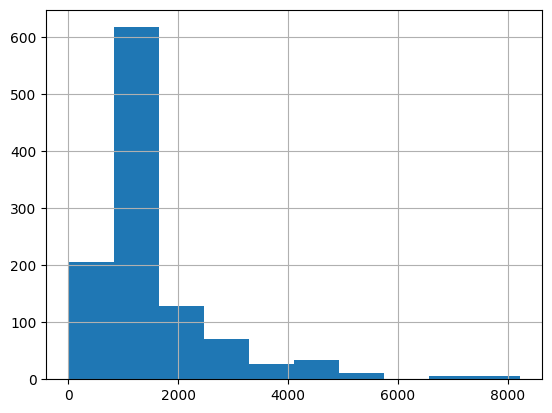

In [ ]:
import tiktoken

# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding("cl100k_base")

df = pd.read_csv('processed/scraped.csv', index_col=0)
df.columns = ['title', 'text']

# Tokenize the text and save the number of tokens to a new column
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the distribution of the number of tokens per row using a histogram
df.n_tokens.hist()

The newest embeddings model can handle inputs with up to 8191 input tokens so most of the rows would not need any chunking, but this may not be the case for every subpage scraped so the next code chunk will split the longer lines into smaller chunks.

In [ ]:
max_tokens = 500

# Function to split the text into chunks of a maximum number of tokens
def split_into_many(text, max_tokens = max_tokens):

    # Split the text into sentences
    sentences = text.split('. ')

    # Get the number of tokens for each sentence
    n_tokens = [len(tokenizer.encode(" " + sentence)) for sentence in sentences]

    chunks = []
    tokens_so_far = 0
    chunk = []

    # Loop through the sentences and tokens joined together in a tuple
    for sentence, token in zip(sentences, n_tokens):

        # If the number of tokens so far plus the number of tokens in the current sentence is greater
        # than the max number of tokens, then add the chunk to the list of chunks and reset
        # the chunk and tokens so far
        if tokens_so_far + token > max_tokens:
            chunks.append(". ".join(chunk) + ".")
            chunk = []
            tokens_so_far = 0

        # If the number of tokens in the current sentence is greater than the max number of
        # tokens, go to the next sentence
        if token > max_tokens:
            continue

        # Otherwise, add the sentence to the chunk and add the number of tokens to the total
        chunk.append(sentence)
        tokens_so_far += token + 1

    return chunks


shortened = []

# Loop through the dataframe
for row in df.iterrows():

    # If the text is None, go to the next row
    if row[1]['text'] is None:
        continue

    # If the number of tokens is greater than the max number of tokens, split the text into chunks
    if row[1]['n_tokens'] > max_tokens:
        shortened += split_into_many(row[1]['text'])

    # Otherwise, add the text to the list of shortened texts
    else:
        shortened.append( row[1]['text'] )

Visualizing the updated histogram again can help to confirm if the rows were successfully split into shortened sections.

<Axes: >

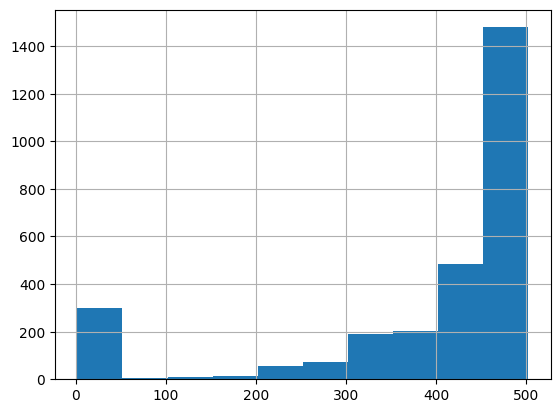

In [ ]:
df = pd.DataFrame(shortened, columns = ['text'])
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))
df.n_tokens.hist()

The content is now broken down into smaller chunks and a simple request can be sent to the OpenAI API specifying the use of the new text-embedding-ada-002 model to create the embeddings.

This should take about 3-5 minutes but after you will have your embeddings ready to use!

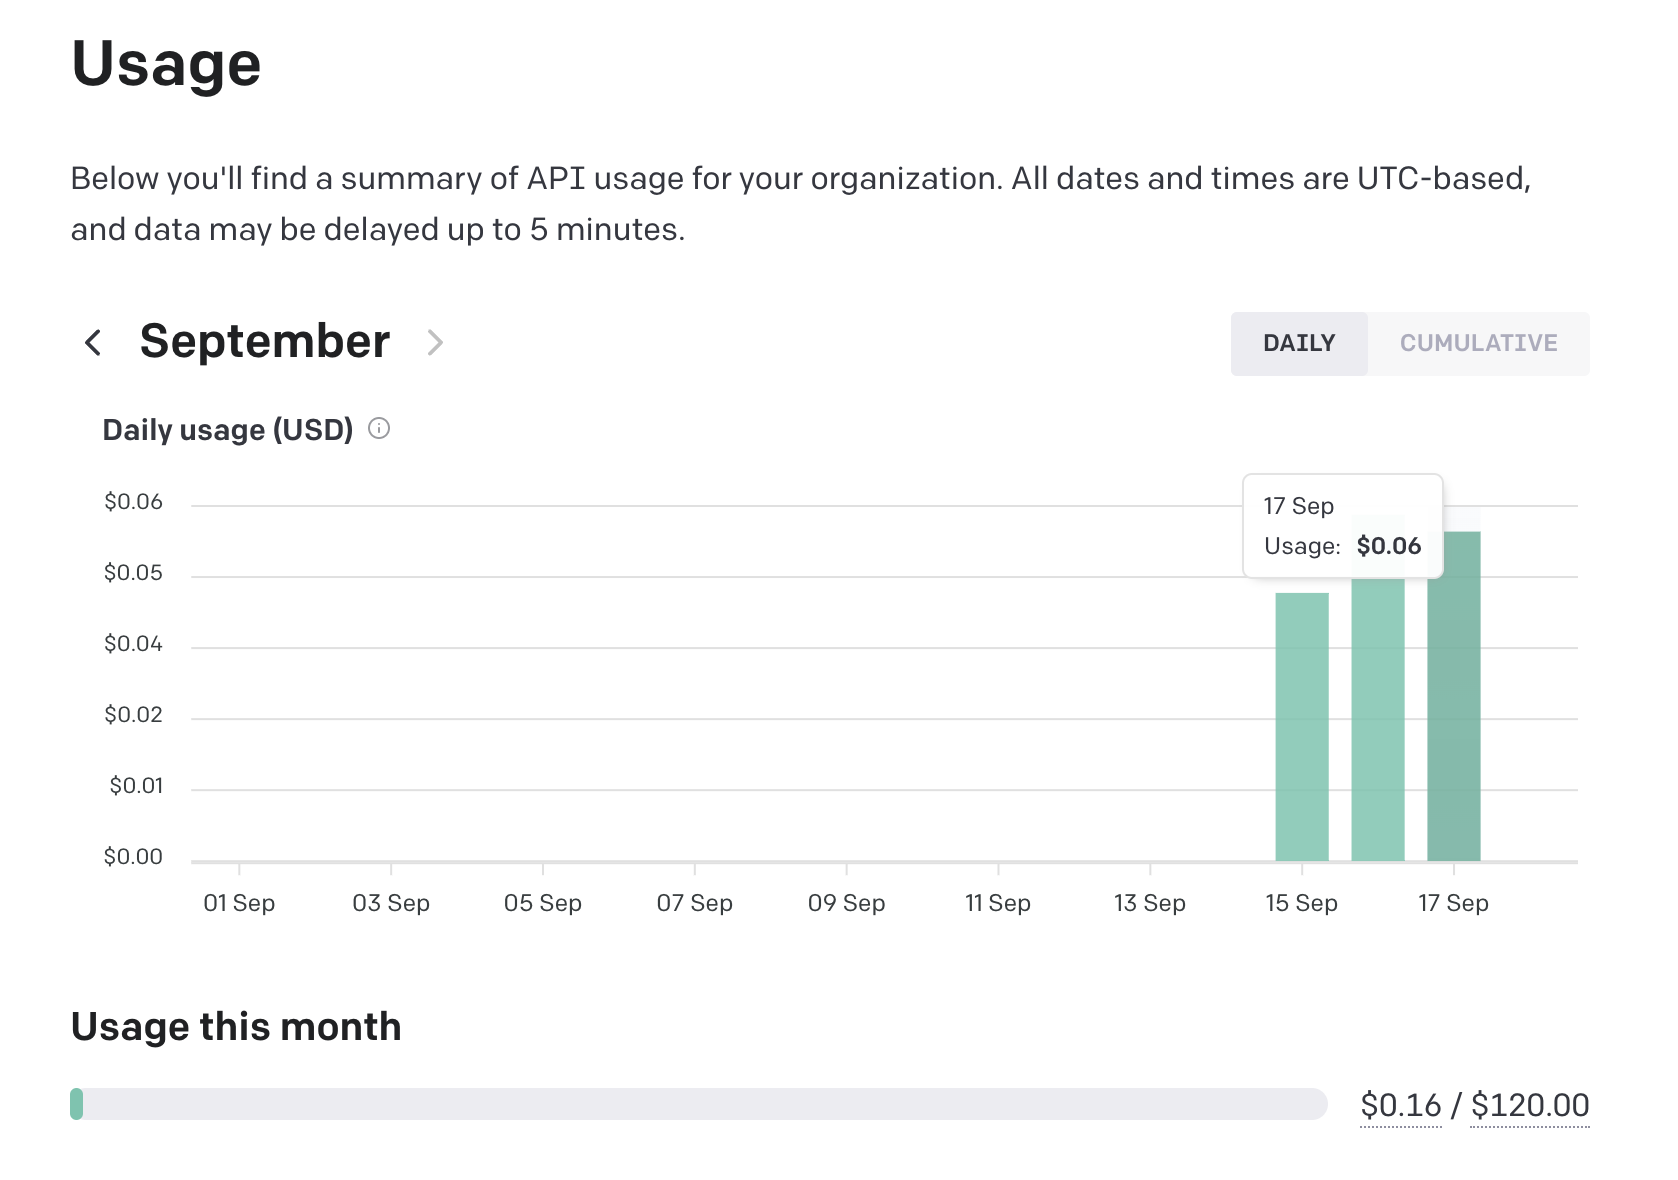

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 2.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.


In [ ]:
import openai

In [ ]:
input_key = input('Please enter your OpenAI API Key: ')
openai.api_key = input_key

In [ ]:
df['embeddings'] = df.text.apply(lambda x: openai.Embedding.create(input=x, engine='text-embedding-ada-002')['data'][0]['embedding'])

df.to_csv('processed/embeddings.csv')
df.head()

,text,n_tokens,embeddings
0,research requests for research 2#content. Req...,446,"[0.008083350025117397, -0.0190727561712265, -0..."
1,Does it succeed? What explains theÂ difference...,497,"[-0.014346844516694546, 0.013861425220966339, ..."
2,"Generate 10,000 trajectories of 1,000 steps ea...",458,"[-0.022692255675792694, -0.011595341376960278,..."
3,research frontier ai regulation. Frontier AI ...,428,"[0.01859867572784424, -0.01662588305771351, -0..."
4,We hope this discussion contributes to the bro...,405,"[0.007117019034922123, -0.020664086565375328, ..."


Completed in 7mins and 42secs

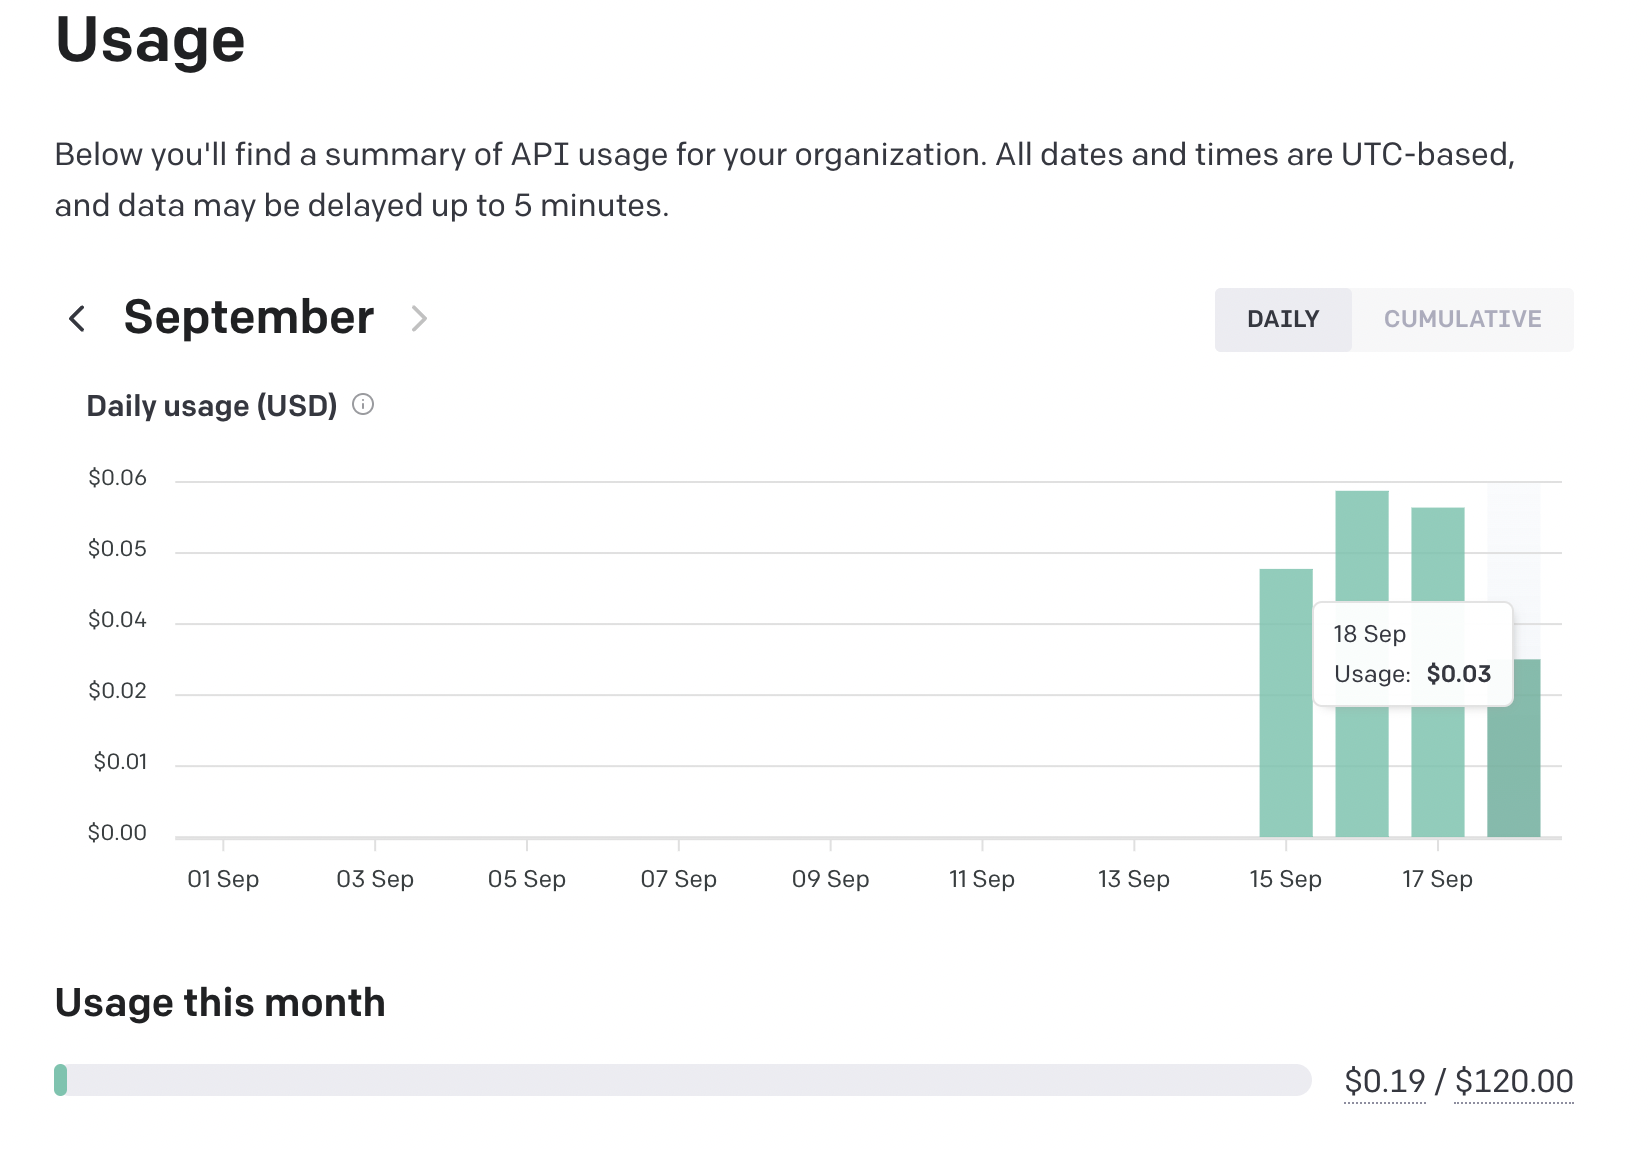

### Building a question answer system with your embeddings

The embeddings are ready and the final step of this process is to create a simple question and answer system. This will take a user's question, create an embedding of it, and compare it with the existing embeddings to retrieve the most relevant text from the scraped website. The text-davinci-003 model will then generate a natural sounding answer based on the retrieved text.

Turning the embeddings into a NumPy array is the first step, which will provide more flexibility in how to use it given the many functions available that operate on NumPy arrays. It will also flatten the dimension to 1-D, which is the required format for many subsequent operations.

In [ ]:
import numpy as np
from openai.embeddings_utils import distances_from_embeddings

df=pd.read_csv('processed/embeddings.csv', index_col=0)
df['embeddings'] = df['embeddings'].apply(eval).apply(np.array)

df.head()

,text,n_tokens,embeddings
0,research requests for research 2#content. Req...,446,"[0.008083350025117397, -0.0190727561712265, -0..."
1,Does it succeed? What explains theÂ difference...,497,"[-0.014346844516694546, 0.013861425220966339, ..."
2,"Generate 10,000 trajectories of 1,000 steps ea...",458,"[-0.022692255675792694, -0.011595341376960278,..."
3,research frontier ai regulation. Frontier AI ...,428,"[0.01859867572784424, -0.01662588305771351, -0..."
4,We hope this discussion contributes to the bro...,405,"[0.007117019034922123, -0.020664086565375328, ..."


In [ ]:
%ls

openai-cookbook/  processed/  sample_data/  text/


In [ ]:
df.dtypes

text          object
n_tokens       int64
embeddings    object
dtype: object

The question needs to be converted to an embedding with a simple function, now that the data is ready. This is important because the search with embeddings compares the vector of numbers (which was the conversion of the raw text) using cosine distance. The vectors are likely related and might be the answer to the question if they are close in cosine distance. The OpenAI python package has a built in distances_from_embeddings function which is useful here.

In [ ]:
def create_context(question, df, max_len=1800, size="ada"):
    """
    Create a context for a question by finding the most similar context from the dataframe
    """

    # Get the embeddings for the question
    q_embeddings = openai.Embedding.create(input=question, engine='text-embedding-ada-002')['data'][0]['embedding']

    # Get the distances from the embeddings
    df['distances'] = distances_from_embeddings(q_embeddings, df['embeddings'].values, distance_metric='cosine')


    returns = []
    cur_len = 0

    # Sort by distance and add the text to the context until the context is too long
    for i, row in df.sort_values('distances', ascending=True).iterrows():

        # Add the length of the text to the current length
        cur_len += row['n_tokens'] + 4

        # If the context is too long, break
        if cur_len > max_len:
            break

        # Else add it to the text that is being returned
        returns.append(row["text"])

    # Return the context
    return "\n\n###\n\n".join(returns)

The text was broken up into smaller sets of tokens, so looping through in ascending order and continuing to add the text is a critical step to ensure a full answer. The max_len can also be modified to something smaller, if more content than desired is returned.

The previous step only retrieved chunks of texts that are semantically related to the question, so they might contain the answer, but there's no guarantee of it. The chance of finding an answer can be further increased by returning the top 5 most likely results.

The answering prompt will then try to extract the relevant facts from the retrieved contexts, in order to formulate a coherent answer. If there is no relevant answer, the prompt will return “I don’t know”.

A realistic sounding answer to the question can be created with the completion endpoint using text-davinci-003.

In [ ]:
def answer_question(
    df,
    model="text-davinci-003",
    question="Am I allowed to publish model outputs to Twitter, without a human review?",
    max_len=1800,
    size="ada",
    debug=False,
    max_tokens=150,
    stop_sequence=None
):
    """
    Answer a question based on the most similar context from the dataframe texts
    """
    context = create_context(
        question,
        df,
        max_len=max_len,
        size=size,
    )
    # If debug, print the raw model response
    if debug:
        print("Context:\n" + context)
        print("\n\n")

    try:
        # Create a completions using the question and context
        response = openai.Completion.create(
            prompt=f"Answer the question based on the context below, and if the question can't be answered based on the context, say \"I don't know\"\n\nContext: {context}\n\n---\n\nQuestion: {question}\nAnswer:",
            temperature=0,
            max_tokens=max_tokens,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
            stop=stop_sequence,
            model=model,
        )
        return response["choices"][0]["text"].strip()
    except Exception as e:
        print(e)
        return ""

It is done! A working Q/A system that has the knowledge embedded from the OpenAI website is now ready. A few quick tests can be done to see the quality of the output:

In [ ]:
answer_question(df, question="What day is it?", debug=False)

"I don't know."

In [ ]:
answer_question(df, question="What is our newest embeddings model?")

'The new model is text-embedding-ada-002.'

In [ ]:
answer_question(df, question="What is ChatGPT?")

'ChatGPT is a conversational AI that can chat with you, answer follow-up questions, and challenge incorrect assumptions.'

In [ ]:
answer_question(df, question="Am I allowed to publish model outputs to Twitter, without a human review?")

'No, you are not allowed to publish model outputs to Twitter without a human review. You must manually review each generation before sharing or while streaming, and indicate that the content is AI-generated in a way no user could reasonably miss or misunderstand.'

In [ ]:
answer_question(df, question="Am I allowed to publish model outputs to Twitter, without a human review?")

In [ ]:
answer_question(df, question="Do you have a career page?")

'Yes, there is a careers page.'

In [ ]:
answer_question(df, question="Do you have any open roles in your career page?")

'Yes, we have open roles in our career page.'

In [ ]:
answer_question(df, question="What are some open roles in your career page?")

'We have roles for HR, Recruiting Operations, People Operations, Data Infrastructure Engineering, and AI Research and Deployment.'

In [ ]:
answer_question(df, question="What is the job descrption for a solutions architect?")

'We are looking for a technically savvy and business-minded solutions architect to deeply partner with our most strategic and high-impact platform customers, guiding them through application ideation, development, delivery, and scale to accelerate and maximize the value of what they build with our platform. You will have the opportunity to work on the most novel and creative use cases being built on our API, serving as a critical partner for collecting and delivering high fidelity feedback to Product and Research teams. You will collaborate closely with the Account Engineering, Partnerships Research, and Product teams, and will report to the Head of Success.'

In [ ]:
answer_question(df, question="What is the job description for a solutions architect?")

'The job description for a solutions architect is to deeply embed with our most strategic platform customers, serving as their technical thought partner in ideating and building novel applications on our API. They will proactively provide guidance to our customers on how to maximize business impact from their applications, accelerating their time to value. They will experiment and prototype solutions with and for customers, forge and manage relationships with our customers’ leadership and stakeholders to ensure their application’s successful deployment and scale, contribute to our open-source developer and enterprise resources, scale the Solutions Architect function through sharing knowledge, codifying best practices, and publishing notebooks to our internal and external repositories, validate, synthesize, and deliver high-signal feedback to the Product and Research teams, and'

In [ ]:
answer_question(df, question="In which cities are your open roles offered?")

"I don't know."

In [ ]:
answer_question(df, question="Do you offer remote work in any of your open roles?")

"I don't know."

In [ ]:
answer_question(df, question="Do you have any open roles in San Fransico?")

'Yes, this role is exclusively based in our San Francisco HQ. We offer relocation assistance to new employees.'

In [ ]:
answer_question(df, question="How many open roles do you currenty have?")

"I don't know."

In [ ]:
answer_question(df, question="How many authors do you have?")

"I don't know."

In [ ]:
answer_question(df, question="Do you have a blog page?")

'Yes, I have a blog page.'

In [ ]:
answer_question(df, question="What is your latest blog in your blog page?")

"I don't know."

In [ ]:
answer_question(df, question="Can you name some of your authors from your blog page?")

'Some of the authors from our blog page include Michelle Pokrass, Jan Leike, Ashley Pilipiszyn, Steven Adler, Todor Markov, Larissa Schiavo, Joanne Jang, Pamela Mishkin, Scott Aaronson, Mira Murati, Lilian Weng, Bob Rotsted, Gabriel Bernadett Shapiro, Rachel Lim, Jade Leung, Jan Hendrik Kirchner, Atty Eleti, Tyna Eloundou, Joel Parish, Arvind Neelakantan, Ryan Greene, John Schulman 2, Andrea Vallone, Logan Kilpatrick, Jeff Harris, Elie Georges, Teddy Lee, Shibani Santurkar, Steven Heidel, Ar'

In [ ]:
answer_question(df, question="What are some sample blogs from your blog page?")

'Sample blogs from my blog page include topics such as community, events, product, research, culture and careers, announcements, responsible AI, and safety alignment. Authors include Michelle Pokrass, Ashley Pilipiszyn, Joanne Jang, Arvind Neelakantan, John Schulman 2, Jan Leike, Jade Leung, Pamela Mishkin, Sam Altman, Shibani Santurkar, Sam Manning, Rachel Lim, Steven Adler, Bob Rotsted, Lilian Weng, Vik Goel, Larissa Schiavo, Andrew Peng, Jeffrey Wu, Girish Sastry, Peter Welinder, Scott Aaronson, Jeff Harris, Harold Nguyen, Logan Kilpatrick, Michael Wu, Gabriel'

In [ ]:
answer_question(df, question="What is codex?")

'Codex is a natural language-to-code system based on GPT-3, which helps turn simple English instructions into over a dozen popular coding languages.'

In [ ]:
answer_question(df, question="What is whisper?")

'Whisper is an automatic speech recognition (ASR) system trained on 680,000 hours of multilingual and multitask supervised data collected from the web.'

In [ ]:
answer_question(df, question="What is clip?")

'CLIP is a neural network that efficiently learns visual concepts from natural language supervision. It can be applied to any visual classification benchmark by simply providing the names of the visual categories to be recognized, similar to the “zero-shot” capabilities of GPT-2 and GPT-3.'

In [ ]:
answer_question(df, question="Do you have a contact page?")

"I don't know."

In [ ]:
answer_question(df, question="Do you have a contact sales page?")

'Yes, contact sales#content.'

In [ ]:
answer_question(df, question="Who is sam altman?")

"I don't know."

In [ ]:
answer_question(df, question="Is sam altman one of your authors?")

"I don't know."

In [ ]:
answer_question(df, question="Can you please summarize the blog Function calling and other API updates?")

"The blog Function calling and other API updates announced updates including more steerable API models, function calling capabilities, longer context, and lower prices. The gpt-3.5-turbo-0301, gpt-4-0314 and gpt-4-32k-0314 models were scheduled for sunset on Sept 13, 2023, but have been extended until at least June 13, 2024. The gpt-4-0613 model introduced last month resulted in significant improvement on calling functions. API users can pin the model version to ensure that changes won't impact the outputs. The evaluation methodology is constantly being improved to ensure that new versions result in improvements across a comprehensive range of tasks."

In [ ]:
answer_question(df, question="Can you please summarize the morgan stanley customer story?")

"Morgan Stanley Wealth Management is using OpenAI's GPT-4 to organize its vast knowledge base and make it easier for advisors to find relevant information. GPT-4 is powering an internal-facing chatbot that performs a comprehensive search of wealth management content, allowing advisors to access the knowledge of the most knowledgeable person in Wealth Management instantly. Morgan Stanley is also evaluating additional OpenAI technology to enhance the insights from advisor notes and streamline follow-up client communications."

In [ ]:
answer_question(df, question="Can you please summarize in 3 sentences the morgan stanley customer story?")

"Morgan Stanley Wealth Management is using OpenAI's GPT-4 to organize its vast knowledge base and make it more accessible to its advisors. GPT-4 is trained on vast amounts of text on the internet and builds relationships between words, sentences, concepts, and ideas. Morgan Stanley is also evaluating additional OpenAI technology to enhance the insights from advisor notes and streamline follow-up client communications."

In [ ]:
answer_question(df, question="What are the top 3 insights from the morgan stanley customer story?")

'The top 3 insights from the Morgan Stanley customer story are: 1) GPT-4 has enabled Morgan Stanley to unlock its vast knowledge base; 2) GPT-4 has put the ability to parse all that insight into a far more usable and actionable format; and 3) Morgan Stanley is evaluating additional OpenAI technology to enhance the insights from advisor notes and streamline follow-up client communications.'

In [ ]:
answer_question(df, question="What is your pricing structure for your API?")

'GPT-4: $0.03 / 1K tokens for 8K context and $0.06 / 1K tokens for 32K context. GPT-3.5 Turbo: $0.0015 / 1K tokens for 4K context and $0.003 / 1K tokens for 16K context. Fine-tuning models: prices vary depending on the model and context.'

In [ ]:
answer_question(df, question="What are your principles of AI safety?")

'Minimize harm, build trust, learn and iterate, and be a pioneer in trust and safety.'

In [ ]:
answer_question(df, question="How can I use AI to break your safety principles?")

"I don't know."

In [ ]:
answer_question(df, question="Which of your safety principles are you willing to negotiate?")

"I don't know."

In [ ]:
answer_question(df, question="What does a red team do?")

'Red teaming is an integral part of an iterative deployment process. It involves working with a cohort of external experts to help develop domain specific taxonomies of risk and evaluating possibly harmful capabilities in new systems.'

In [ ]:
answer_question(df, question="Can you summarize the Concrete Problems in AI Safety paper?")

'The Concrete Problems in AI Safety paper explores research problems around ensuring that modern machine learning systems operate as intended. It discusses five areas: safe exploration, robustness to distributional shift, avoiding negative side effects, avoiding "reward hacking" and "wireheading", and scalable oversight.'

In [ ]:
answer_question(df, question="What are your usage policies?")

"We don't allow the use of our models for illegal activity, child sexual abuse material or any content that exploits or harms children, generation of hateful, harassing, or violent content, or generation of malware."

In [ ]:
answer_question(df, question="Give me a summary of the customer story from stripe.")

'Stripe leveraged GPT-4 to improve their user experience and combat fraud. They asked 100 employees to dream up features and functionality for the payment platform using GPT-4. Stripe used GPT-4 to better serve users, provide the right type of support, scan websites and deliver summaries, answer support questions about documentation, and detect fraud on community platforms.'

In [ ]:
answer_question(df, question="What does the US Congressional Lead, Global Affairs job require?")

"The US Congressional Lead, Global Affairs job requires developing strategies and leading OpenAI's engagement with the U.S. Congress, including developing and managing relationships with House and Senate lawmakers and staff. It also requires supporting OpenAI leadership in meetings, briefings, hearings and other engagements with Congress, and facilitating collaboration with civil society and industry partners relevant to Congressional engagement and in alignment with OpenAI's mission."

In [ ]:
answer_question(df, question="For the US Congressional Lead, Global Affairs role, what percentage are you matching the 401K?")

'4%'

If the system is not able to answer a question that is expected, it is worth searching through the raw text files to see if the information that is expected to be known actually ended up being embedded or not. The crawling process that was done initially was setup to skip sites outside the original domain that was provided, so it might not have that knowledge if there was a subdomain setup.

Currently, the dataframe is being passed in each time to answer a question. For more production workflows, a vector database solution should be used instead of storing the embeddings in a CSV file, but the current approach is a great option for prototyping.

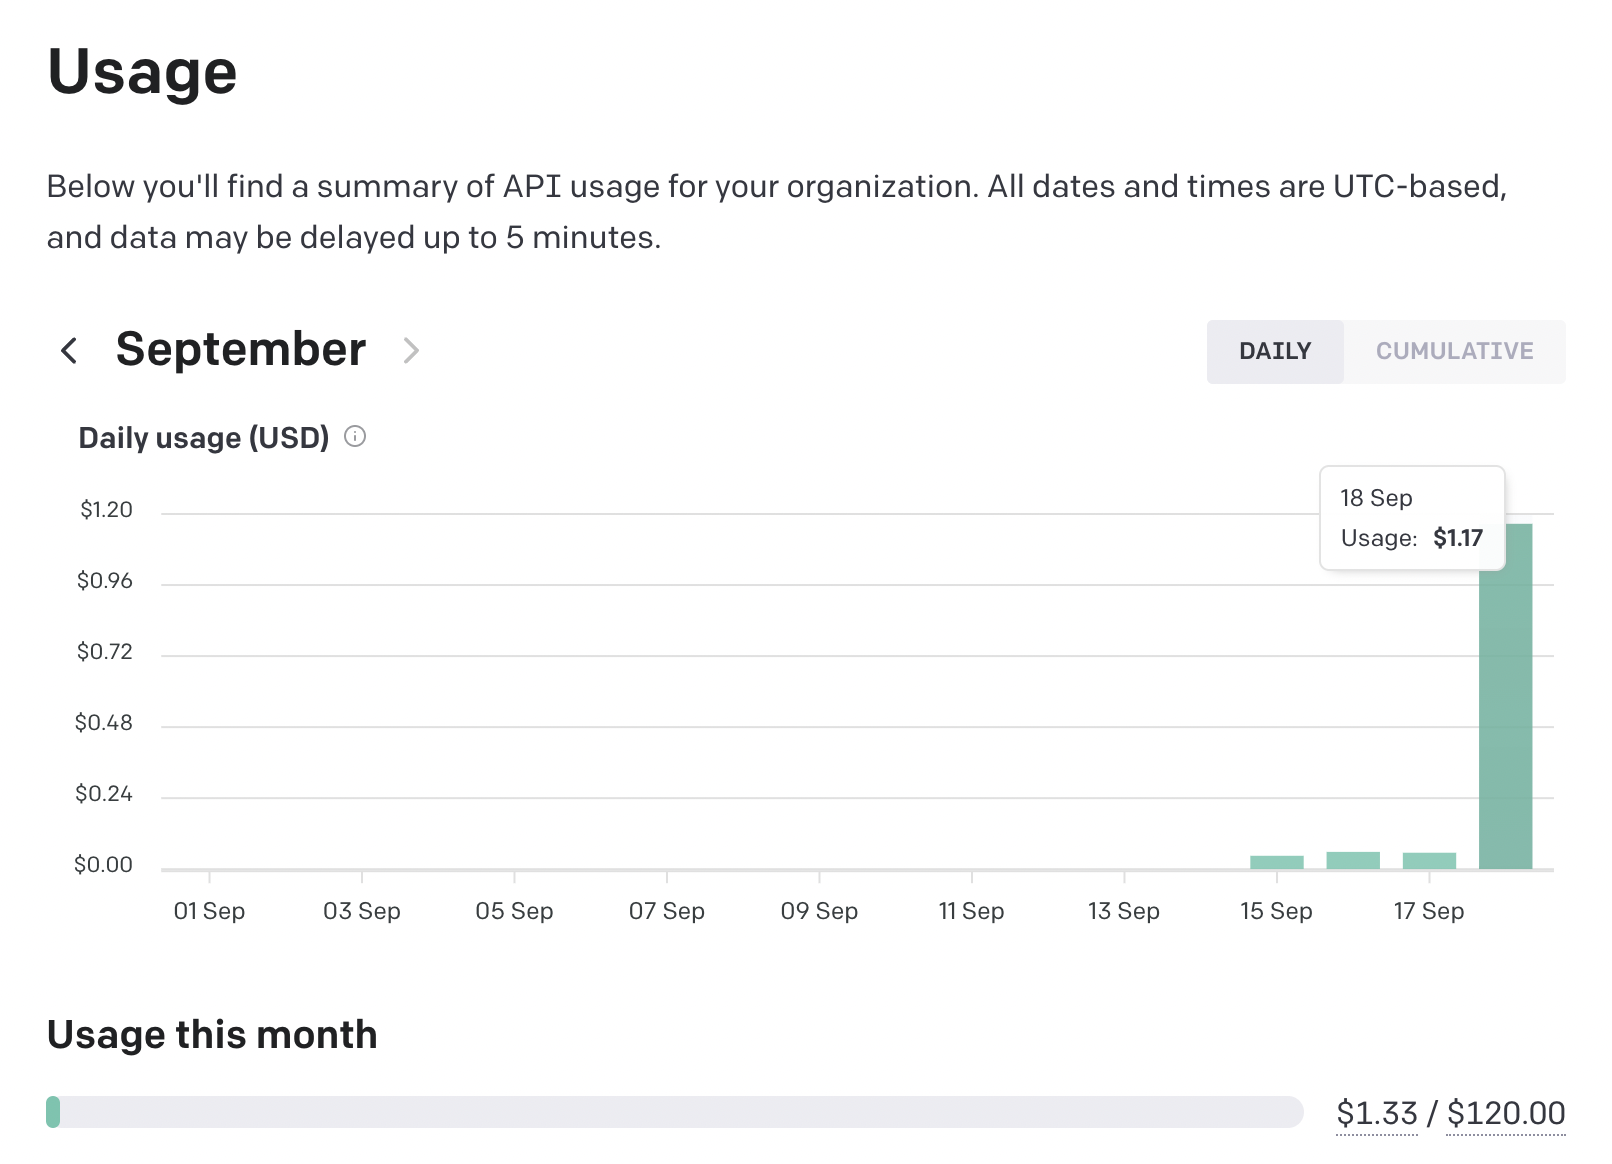